<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6) #สร้างข้อมูล 300 จุด 3 กลุ่มแต่ละข้อมูล 2 ลักษณะ 

In [4]:
x.shape

(300, 2)

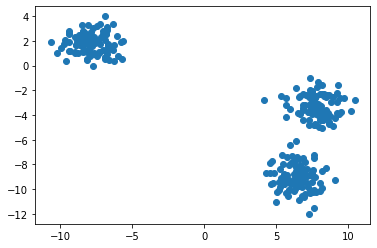

In [6]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0],x[:,1])

Import

In [7]:
from sklearn.cluster import KMeans

Define

In [13]:
KMclust = KMeans(n_clusters=3)

Train

In [14]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predict

In [15]:
label = KMclust.predict(x)

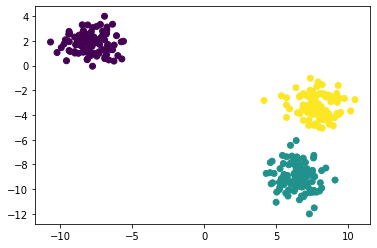

In [16]:
plt.scatter(x[:, 0], x[:, 1], c=label)

Color quantization (application of kmean)

In [19]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2
import os

In [21]:
img = cv2.imread(os.path.join(path,'dbe0a19e31adca49016975b5480de87a.jpg')) #เรียกใช้รูปภาพ

In [23]:
img.shape # แถว หลัก จำนวนสี rgb คือ แต่ละคอลัมเป็นแต่ละสี

(810, 540, 3)

In [22]:
img

array([[[  1,  18,  45],
        [  1,  18,  45],
        [  1,  18,  45],
        ...,
        [ 81, 124,  73],
        [ 83, 124,  73],
        [ 83, 124,  73]],

       [[  1,  18,  45],
        [  1,  18,  45],
        [  1,  18,  45],
        ...,
        [ 87, 130,  79],
        [ 89, 130,  79],
        [ 89, 130,  79]],

       [[  1,  18,  45],
        [  1,  18,  45],
        [  1,  18,  45],
        ...,
        [ 83, 126,  75],
        [ 85, 126,  75],
        [ 85, 126,  75]],

       ...,

       [[102,  70,  21],
        [112,  83,  32],
        [ 96,  68,  14],
        ...,
        [ 98, 159, 225],
        [ 98, 159, 225],
        [ 98, 159, 225]],

       [[106,  73,  23],
        [ 82,  49,   0],
        [ 89,  57,   4],
        ...,
        [ 98, 159, 225],
        [ 98, 159, 225],
        [ 98, 159, 225]],

       [[108,  73,  23],
        [ 84,  49,   0],
        [ 89,  57,   4],
        ...,
        [ 98, 159, 225],
        [ 98, 159, 225],
        [ 98, 159, 225]]

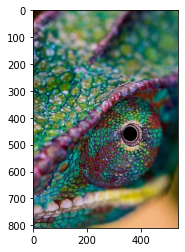

In [24]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #สลับสี เพราะคอมมันเห็นไม่เหมือนเรา
plt.imshow(RGB_img)

count unique color

In [25]:
import numpy as np

In [26]:
np.unique(RGB_img).shape

(256,)

Use K-mean to reduce color from 256 colors to 8 colors

In [27]:
#Define
myQuantize = KMeans(n_clusters=10) #ลดสีให้เหลือ 10 สี

In [29]:
img_row = np.reshape(RGB_img,(810*540, 3))
img_row

array([[ 45,  18,   1],
       [ 45,  18,   1],
       [ 45,  18,   1],
       ...,
       [225, 159,  98],
       [225, 159,  98],
       [225, 159,  98]], dtype=uint8)

In [30]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#Predict
res = myQuantize.predict(img_row)

In [32]:
res

array([4, 4, 4, ..., 5, 5, 5], dtype=int32)

Get cluster centers

In [33]:
Clus_cen = myQuantize.cluster_centers_ #หา centroids
Clus_cen

array([[ 73.90929968,  52.38298103,  44.40551146],
       [134.19169059, 140.17003884, 136.78159095],
       [ 45.31565977, 129.23277904, 119.44991028],
       [ 90.89297443, 129.07029597,  82.64916487],
       [ 18.01055722,  36.46964116,  36.72735395],
       [224.99832624, 175.27617044, 116.00435178],
       [185.29925699, 177.18312937, 183.85786713],
       [103.32228215,  79.91064434,  98.96676128],
       [ 24.30952748,  88.9222265 ,  77.77865948],
       [166.78325048, 146.17145176,  69.00507254]])

In [34]:
Clus_cen.shape

(10, 3)

Map color back to the image

In [35]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [37]:
new_img_ = new_img/255 #ตัดทศนิยมด้วยการหารเลขที่มากสุด คือ 255

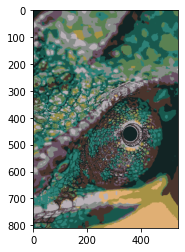

In [38]:
plt.imshow(new_img_)